# MWR example problems

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from sympy import * 

## Analytical solution

In [15]:
c_vec   = np.array([1,5,10])  # velocities
K       = 1    # diffusion constant
nx      = 100  # grid points 
x0      = 0    # left boundary
x1      = 1    # right boundary

# make the mesh and the grid spacing
X       = np.linspace(x0,x1, nx)

In [16]:
# function to compute analytical solution with boundary conditions u(0) = 0 and u(1) = 1
def solve_analytical(u_ex):
    C2      = 1/(1-np.exp(c/K))
    C1      = -C2
    u_ex    = C1*np.exp(c/K*X) + C2

    return u_ex

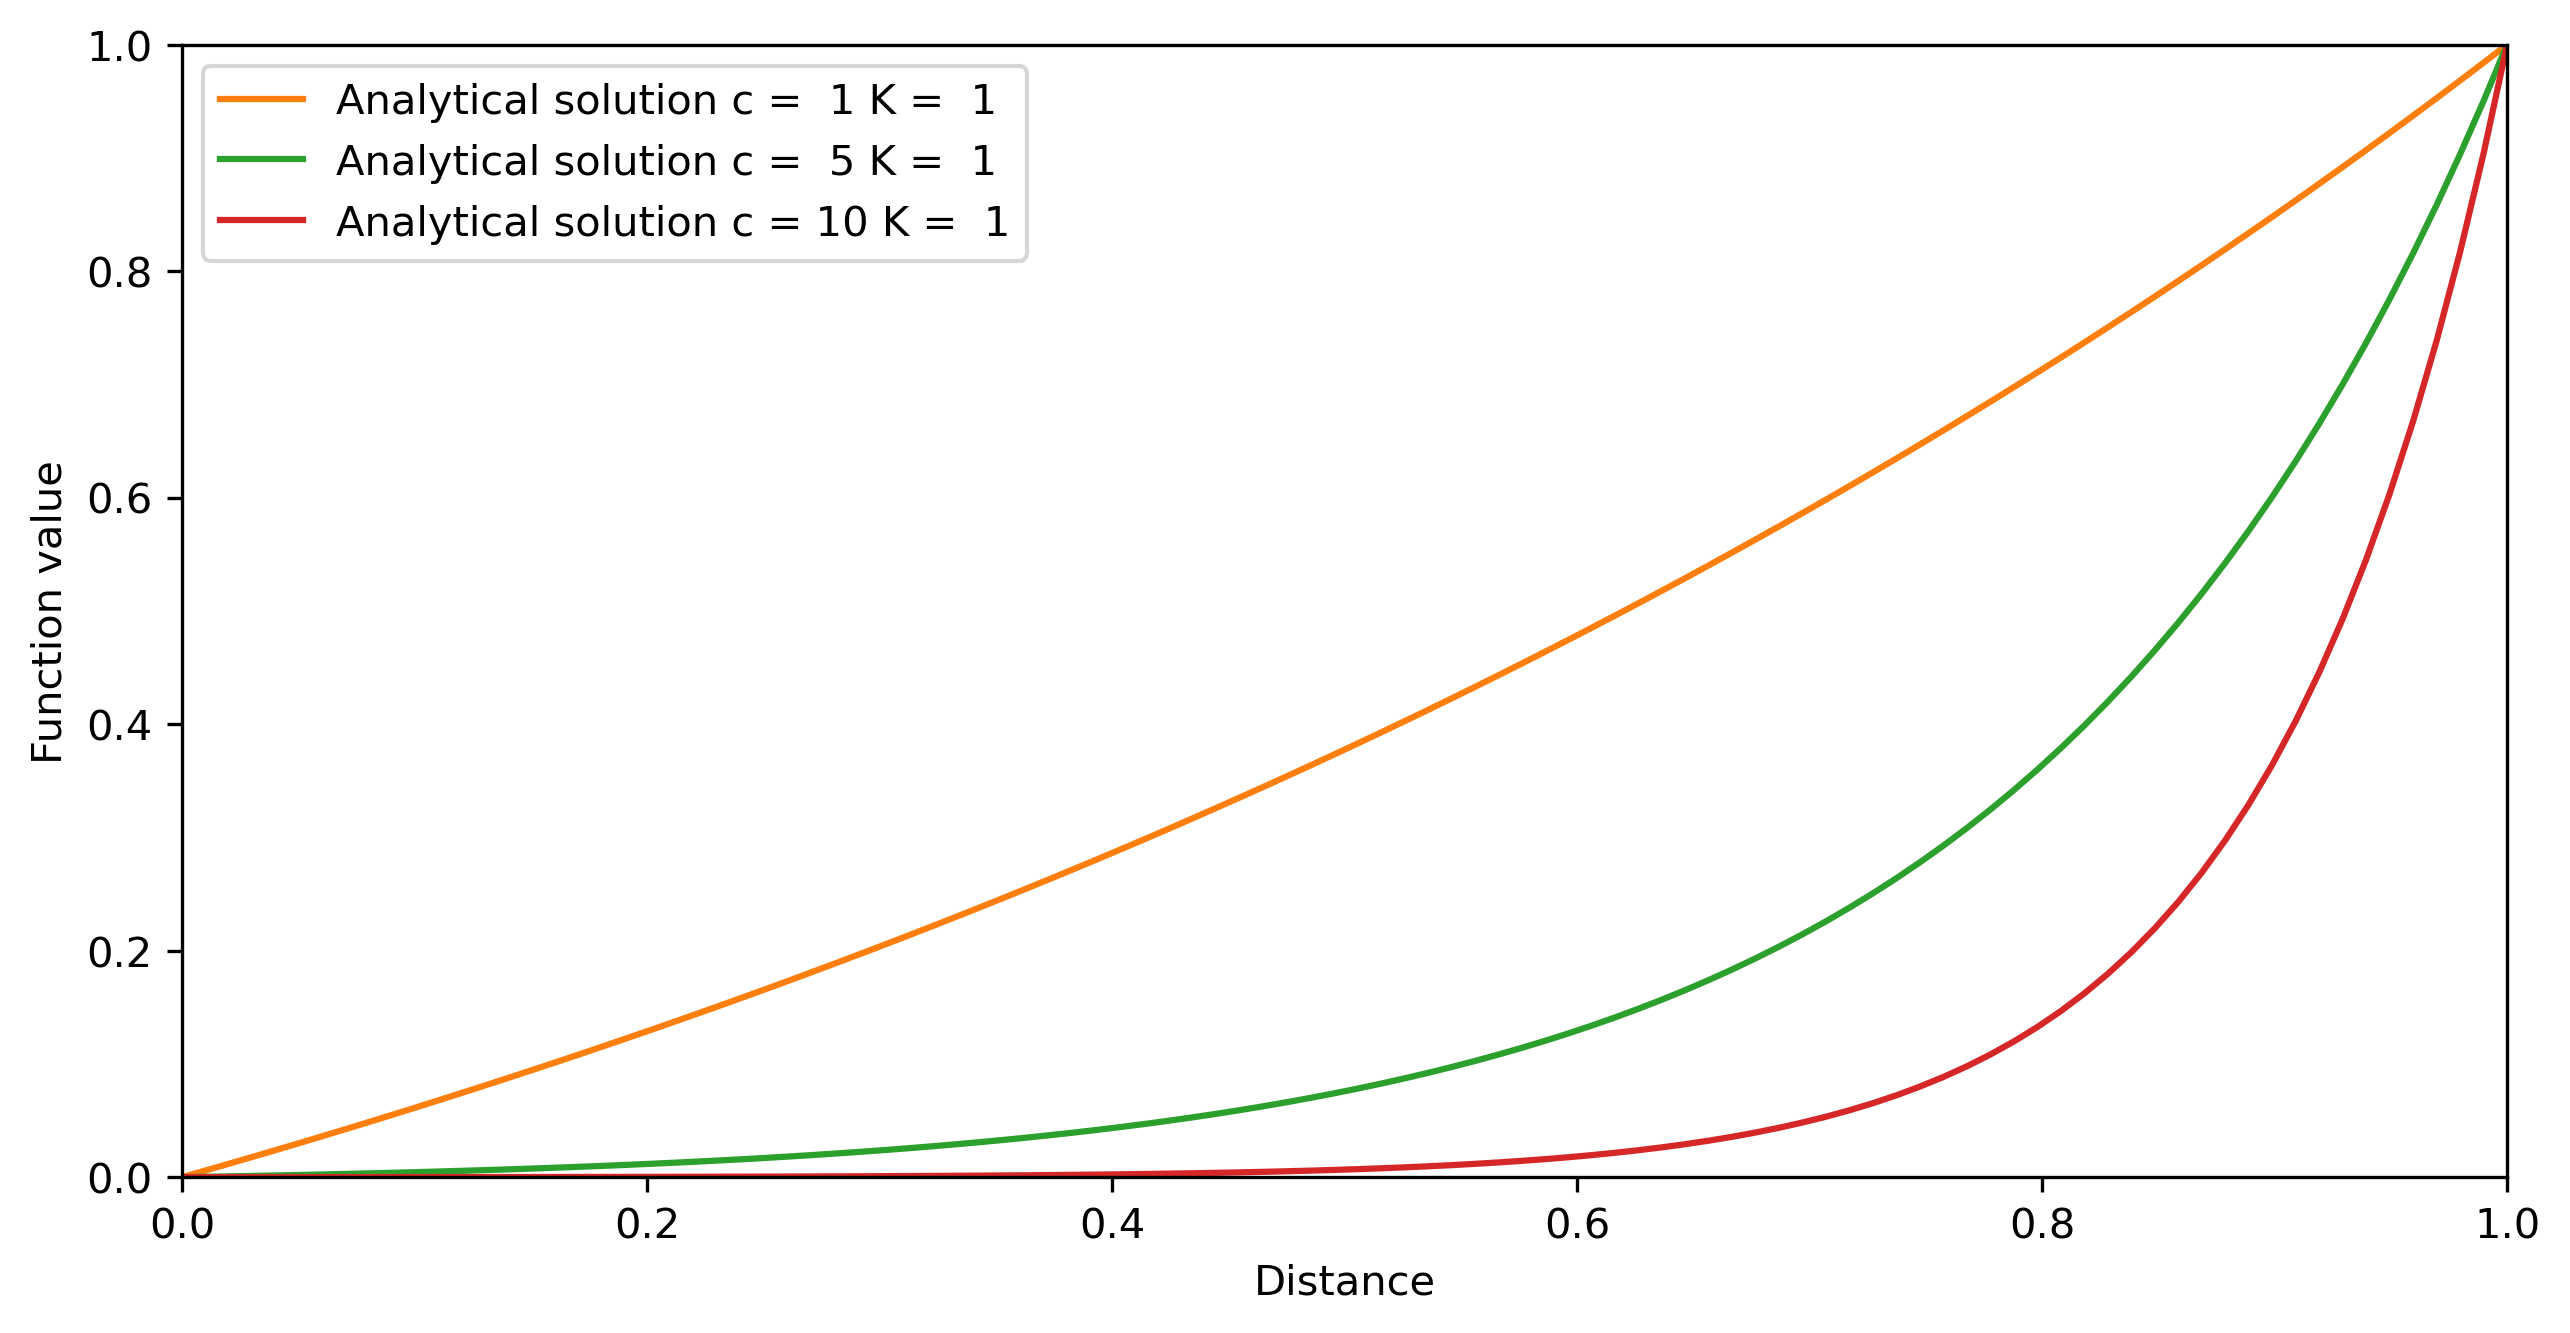

In [155]:
# Plotting
fig = plt.figure(figsize=(10,5))
fig.clf()
ax  = plt.axes(xlim=(0, 1), ylim=(0, 1))
line, = ax.plot([], [], lw=1)
ax.set_xlabel('Distance')
ax.set_ylabel('Function value')

# compute solutions
for c in c_vec:
    u_ex = solve_analytical(u_ex)
    
    plt.plot(X, u_ex, label='Analytical solution c = %2i K = %2i' %(c,K))
    plt.legend()

## Weighted residual results

In [156]:
# global variables
K       = 1
c       = 2

# analytical solution
C2      = 1/(1-np.exp(c/K))
C1      = -C2
u_ex    = C1*np.exp(c/K*X) + C2


In [157]:
# collocation method
a2      = symbols('a2')
xc      = 0.5 #collocation point
Ri      = c*((1-a2)+2*a2*xc) - K*2*a2
a2      = solve(Ri, a2)
a2      = float(list(a2)[0].n()) # convert result to float

a0      = 0               # boundary conditions - see the script for details
a1      = 1-a2           # boundary conditions

# so that the final polynomial is
u_c     = a0 + a1*X + a2*(np.square(X))

#check of the solution -> first derivative - second derivative at x=0.5 needs to be zero
print(c*(a1 + 2*xc*a2) - K*2*a2)

#compute the RMS error
E_rms_collo = sqrt(np.sum(np.square(u_ex - u_c))/nx)
E_x_collo   = np.sqrt(np.square(u_ex - u_c)/nx)

0.0


In [158]:
# hide: the code in this cell is hidden by the author

In [ ]:
# least squares
#a2,x    = symbols('a2 x')
#Ri      = ???         #definition of residual
#Wi      = diff(Ri,a2)                        #weight function is derivative of R with a2
#a2      = ??? #symbolic solution

#a2      = float(list(a2)[0].n()) # convert result to float

#a1     = 1-a2;
#a0     = 0

#u_ls    = a0 + a1*X + a2*(np.square(X))

#compute the RMS error
#E_rms_ls = sqrt(np.sum(np.square(u_ex - u_ls))/nx)
#E_x_ls   = np.sqrt(np.square(u_ex - u_ls)/nx)

In [161]:
# hide: the code in this cell is hidden by the author

In [ ]:
# Galerkin
#a2,x    = symbols('a2 x')
#Ri      = ???       #definition of residual
#Wi      = ???                        #weight function is derivative of R with a2
#a2      = ??? #symbolic solution
#a2      = float(list(a2)[0].n()) # convert result to float

#a1     = 1-a2;
#a0     = 0

#u_g    = a0 + a1*X + a2*(np.square(X))

#compute the RMS error
#E_rms_g = sqrt(np.sum(np.square(u_ex - u_g))/nx)
#E_x_g   = np.sqrt(np.square(u_ex - u_g)/nx)

Text(0, 0.5, 'RMS Error')

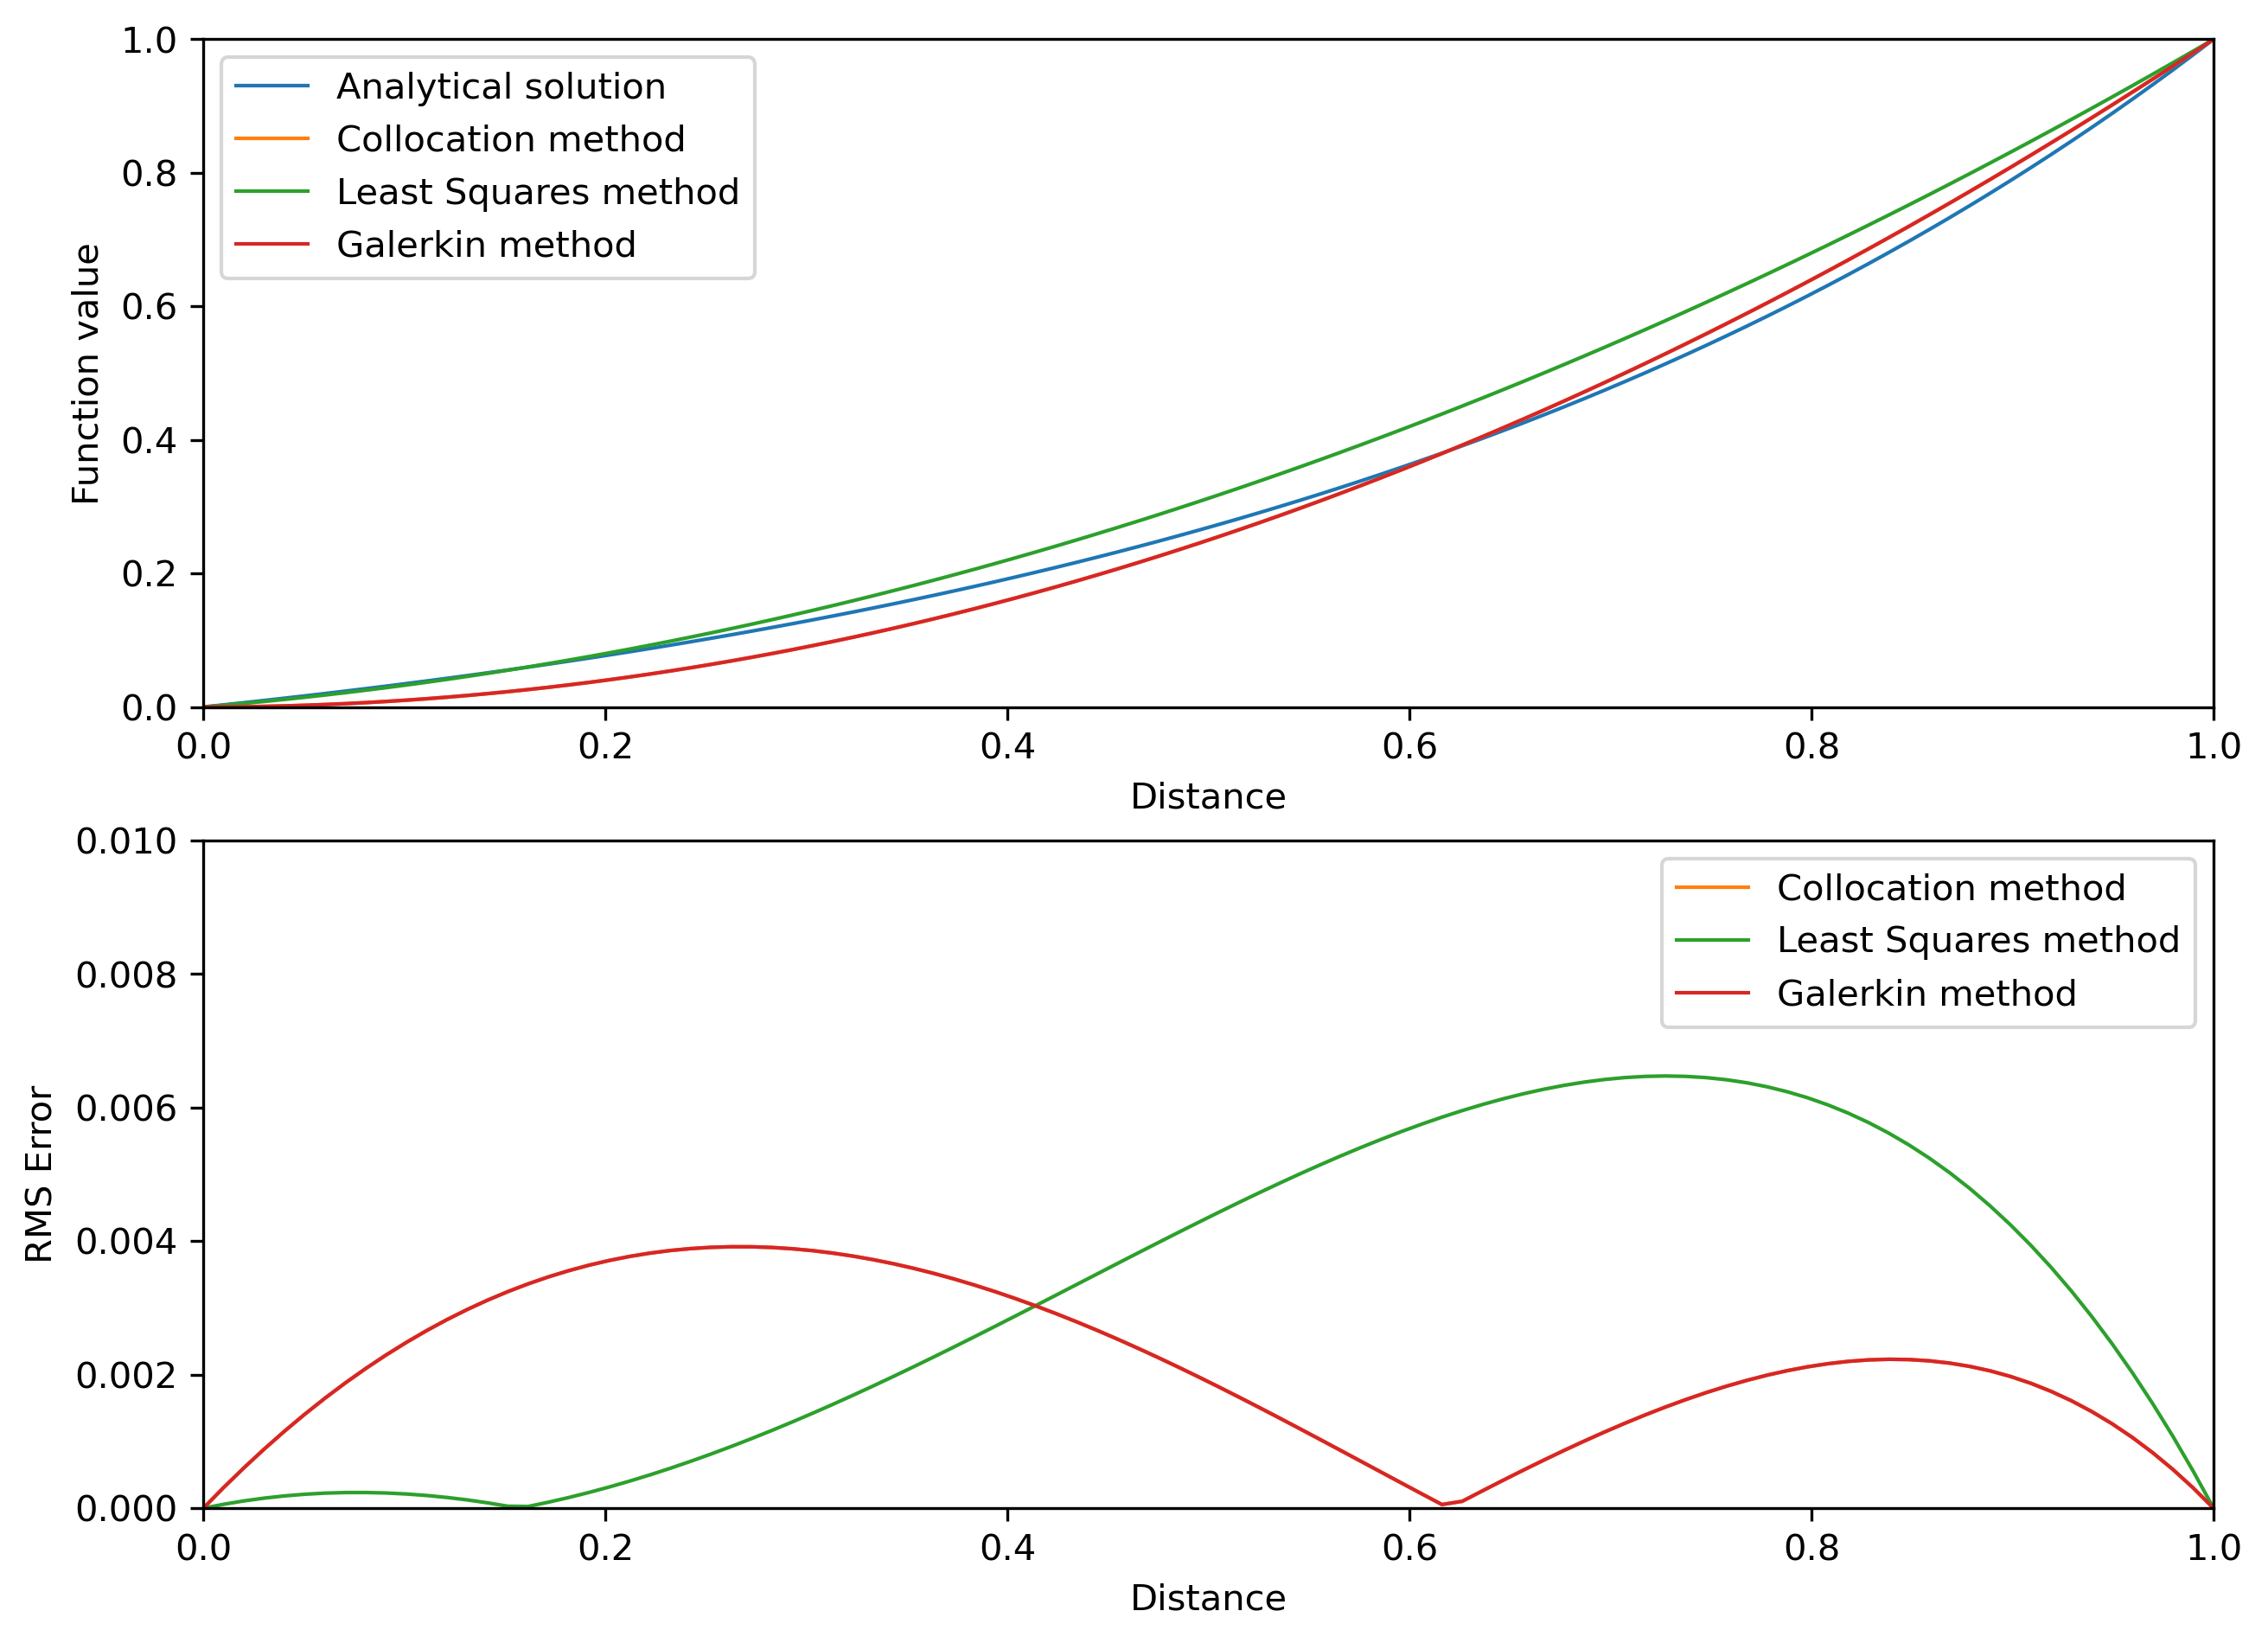

In [167]:
# plotting 
fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7.5))

# prepare axis
# function value 
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.plot(X, u_ex, lw=1,  label='Analytical solution')
ax1.plot(X, u_c, lw=1,  label='Collocation method')
ax1.plot(X, u_ls, lw=1,  label='Least Squares method')
ax1.plot(X, u_g, lw=1,  label='Galerkin method')

ax1.legend()

ax1.set_xlabel('Distance')
ax1.set_ylabel('Function value')

# error estimate
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.01)
ax2.plot([],[],lw=1)
ax2.plot(X, E_x_collo, lw=1, label='Collocation method')
ax2.plot(X, E_x_ls, lw=1, label='Least Squares method')
ax2.plot(X, E_x_g, lw=1, label='Galerkin method')

ax2.legend()

ax2.set_xlabel('Distance')
ax2.set_ylabel('RMS Error')